# **Objectives**
The objective of this notebook is to present the CityLearn environment and how it is used to represent a smart grid setting.




# **The CityLearn Environment**
CityLearn is an open source OpenAI Gym environment for the implementation of Multi-Agent Reinforcement Learning (RL) for building energy coordination and demand response in cities. Its objective is to facilitate and standardize the evaluation of RL agents such that different algorithms can be easily compared with each other.





Districts and cities have periods of high demand for electricity, which raise electricity prices and the overall cost of the power distribution networks. Flattening, smoothening, and reducing the overall curve of electrical demand helps reduce operational and capital costs of electricity generation, transmission, and distribution networks. **Demand response** is the coordination of electricity consuming agents (i.e. buildings) in order to reshape the overall curve of electrical demand.

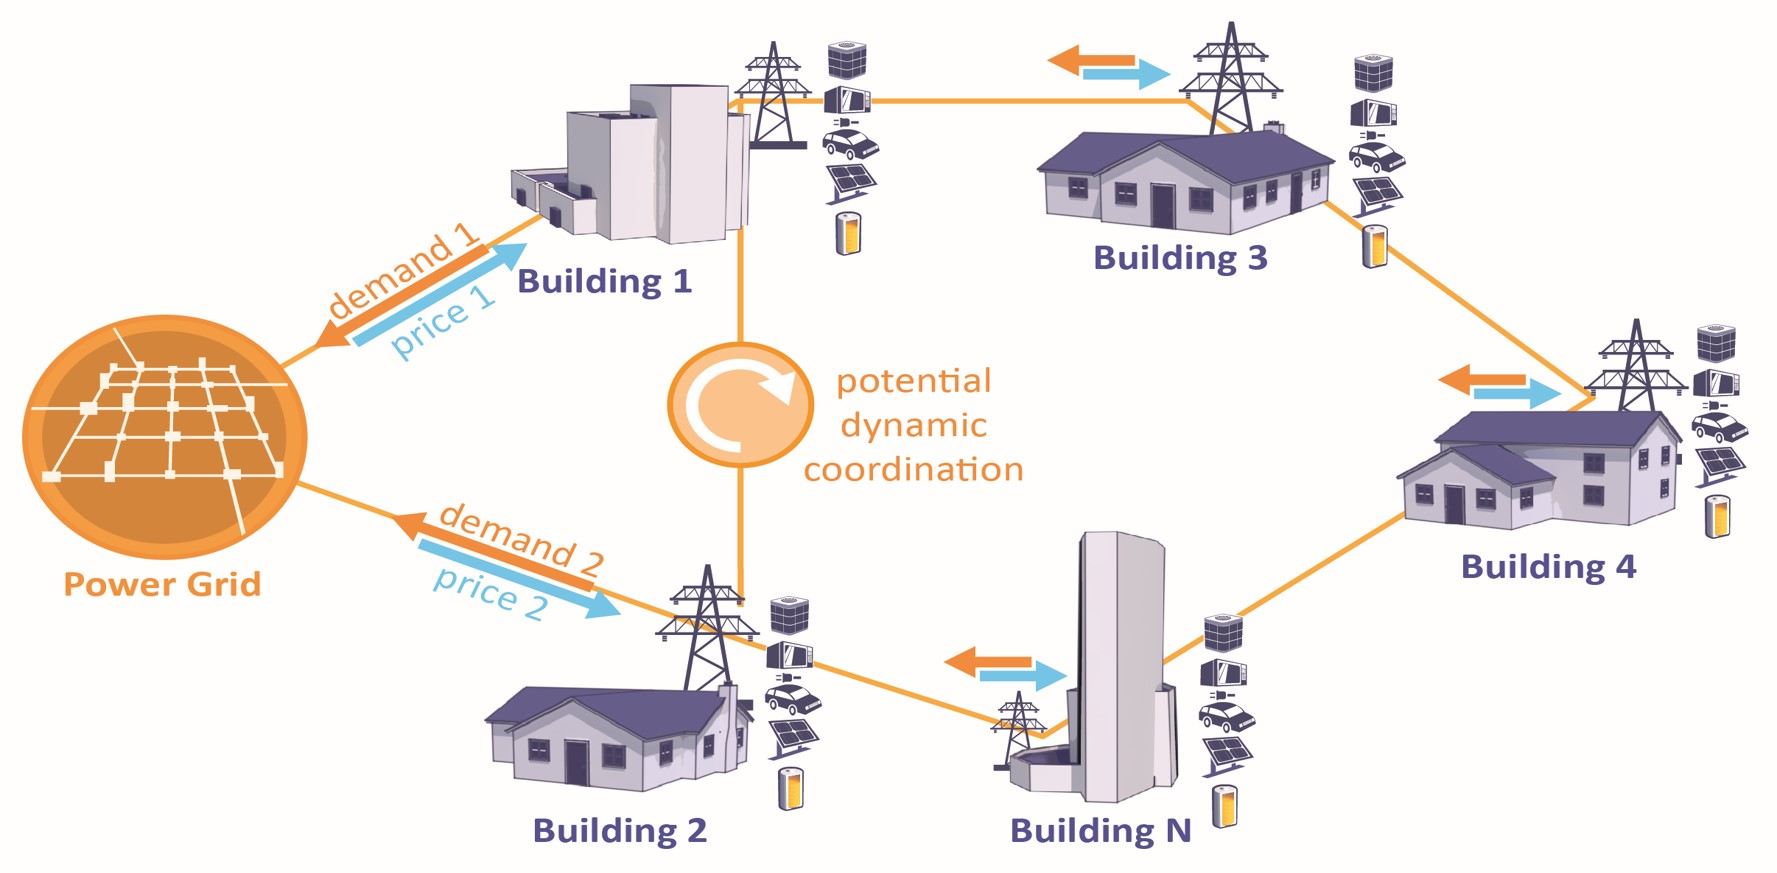


CityLearn allows the easy implementation of reinforcement learning agents in a multi-agent setting to reshape their aggregated curve of electrical demand by controlling the storage of energy by every agent. Currently, CityLearn allows controlling the storage of domestic hot water (DHW), chilled water (for sensible cooling and dehumidification) hot water (for sensible heating) and electricity. CityLearn also includes models of air-to-water heat pumps, electric heaters, solar photovoltaic arrays, and the pre-computed energy loads of the buildings, which include space cooling, dehumidification, appliances, DHW, and solar generation.

CityLearn includes energy models of buildings and distributed energy resources (DER) including air-to-water heat pumps, electric heaters and batteries. A collection of energy models of buildings make up a virtual district (a.k.a neighborhood or community). In each building, space cooling, space heating and domestic hot water end-use loads may be independently satisfied through air-to-water heat pumps. Alternatively, space heating and domestic hot water loads can be satisfied through electric heaters.

Buildings may have a combination of thermal storage tanks and batteries to store energy that may be used at peak or expensive periods to meet space cooling, space heating, domestic hot water and non-shiftable (plug) loads. These storage devices are charged by the electric device (heat pump or electric heater) that satisfies the end-use the stored energy is for. All electric devices as well as plug loads consume electricity from the main grid. Photovoltaic (PV) arrays may be included in the buildings to offset all or part of the electricity consumption from the grid by allowing the buildings to generate their own electricity.

CityLearn is the underlying environment for the NeurIPS 2022 CityLearn Challenge which is described here

https://www.aicrowd.com/challenges/neurips-2022-citylearn-challenge

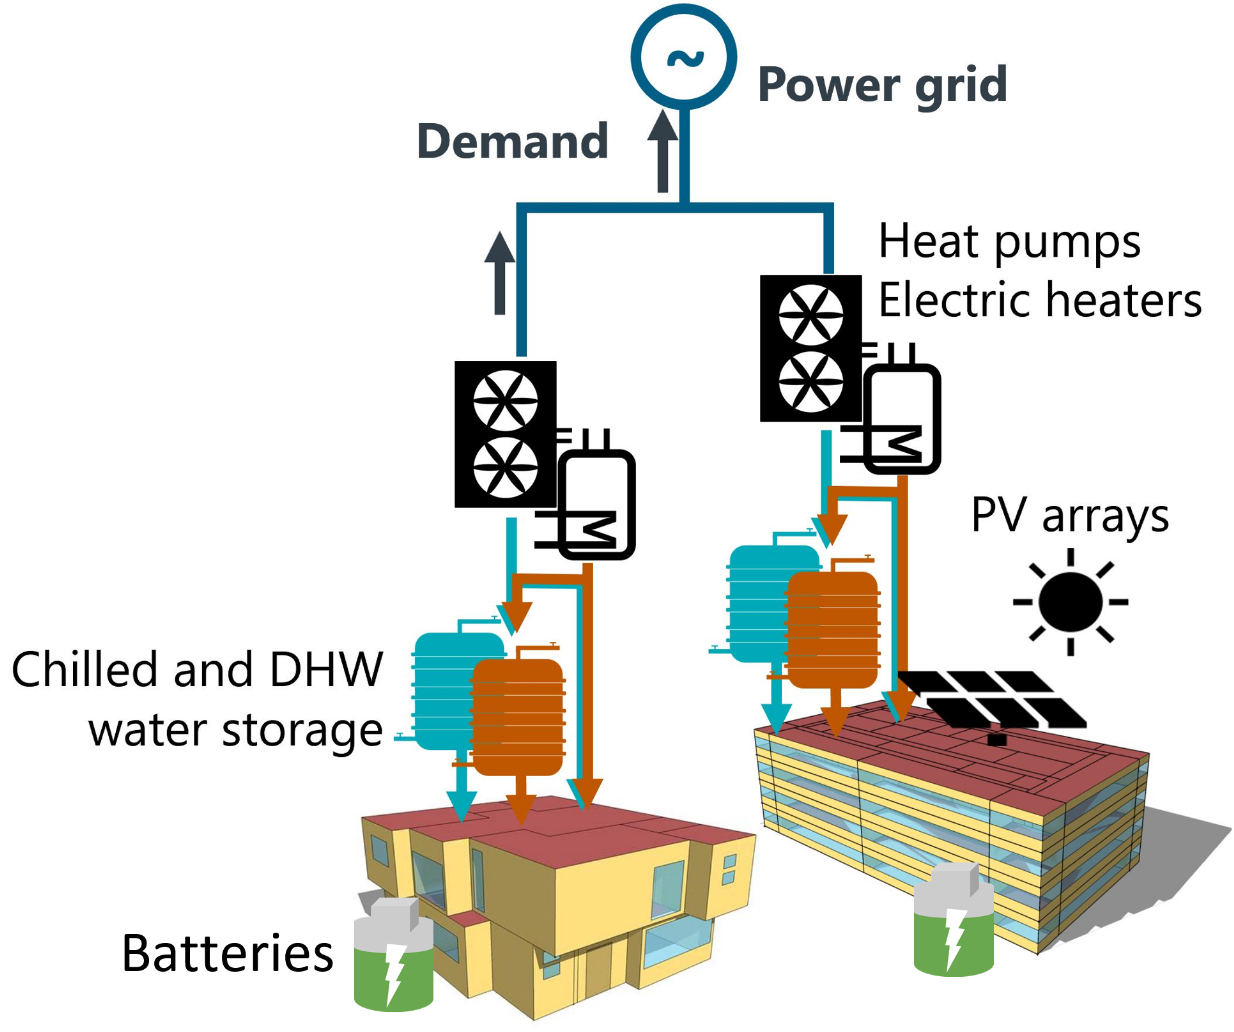

## **Setup**

The CityLearn environment includes 1 year of operational electricity demand and PV generation data from 17 single-family buildings in the Sierra Crest home development in Fontana, California, that were studied for grid integration of zero net energy communities.

The objective is to develop energy management agent(s) that will maximize performance. As a first step the 2022 challenge focused on the optimization of battery usage. For this, users defined a reward function for battery charge and discharge control in each building. The objective was to minimize the monetary cost of electricity drawn from the grid and the CO2 emissions when electricity demand is satisfied by the grid.


The environment repo can be found here:


https://github.com/intelligent-environments-lab/CityLearn/tree/v1.3.0

The environment's readme can be found
[here](https://www.citylearn.net/index.html)

To see a list of publications that have used the citylearn environment review the list [here](https://www.citylearn.net/index.html)

An example of a framework that was develpoed to solve the challenge is described [here](https://jasonjewik.medium.com/single-agent-reinforcement-learning-for-intelligent-energy-management-442117c970e0)

# **The Environment**

As a first step, we will get familiar with the citylearn environment.

We are considering a setting with agents interacting with the environment in a discrete-time setup: at each time step the agent performs an action and receives feedback from the environment in the form of an observation signal and a numeric reward signal.

In a single agent setting - this interaction can be depicted as follows.

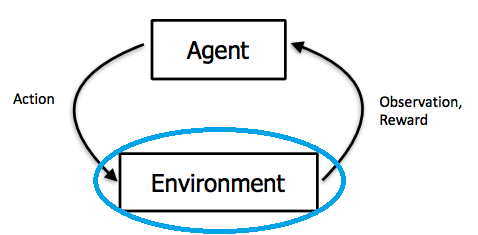

 The blue circle in the diagram is meant to emphasize that our focus here is on the environment and the way it is setup to simulate the setting of interest. We will later focus on the 'Agent'  and cover possible solution approaches that have been/can be devloped to solve it.

In the above diagram, we depict a single agent interacting with the environment.
 In a multi-agent setting, like the one we are considering here, multiple agents are interacting simulationsely with the environment.
We are assuming here that the time step discretization is shared by all agents.


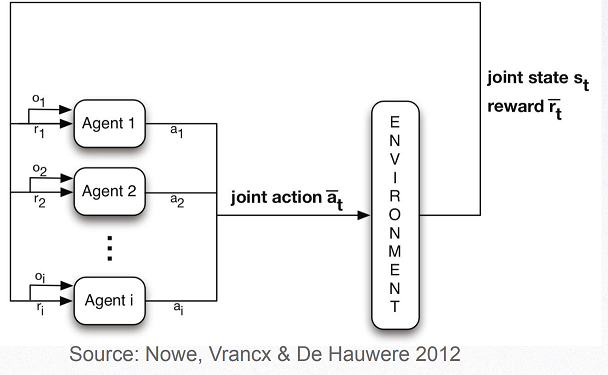

To get started, first install the environemnt

In [ ]:
!pip install -q CityLearn # the -q argument is for not printing the installation process to the screen.

                          # please ignore (if occurs) the following installation error "ERROR: pip's dependency resolver..."
                          # which is a results of torch version being uncompatible with colab,
                          # as long as we do not use PyTorch (in example, for Reinforcement Learning) you
                          # shouldn't be concerned abount it.

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.3/15.3 MB 71.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.9/15.9 MB 59.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.5/11.5 MB 64.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.5/26.5 MB 13.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 137.9/137.9 kB 12.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 776.3/776.3 MB 2.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.1/19.1 MB 52.4 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas==1.5.3, but you have pandas 1.3.5 which is incompatible.
tensorflow 2.12.0 requires numpy<1.24,>=1.22, but you have numpy 1.21.6 which is incompatible.
torchaudio 2.0.2+cu118 requires torch==2.0.1, but you have torch 1.12.0

We will use the CityLearnEnv as a wrapper to the entities in the environment

In [ ]:
from citylearn.citylearn import CityLearnEnv

## **Class Structure**

CityLearn includes energy models of buildings and distributed energy resources (DER) including air-to-water heat pumps, electric heaters and batteries. A collection of building energy models makes up a virtual district (a.k.a neighborhood or community). In each building, space cooling, space heating and domestic hot water end-use loads may be independently satisfied through air-to-water heat pumps. Alternatively, space heating and domestic hot water loads can be satisfied through electric heaters.



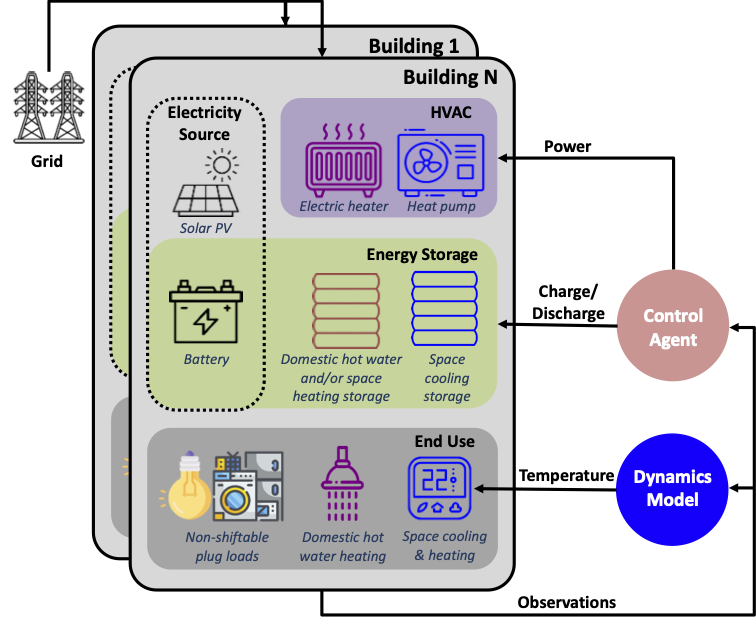

In terms of class structure, the base class is Environment. The Device, Agent and Building classes inherit from Environment to represent the different entities in the system.

*Environment*:


*   CityLearnEnv
*   Building
* Device
  * ElectricDevice
  >
   * HeatPump
   * ElectricHeater
   * PV
 * StorageDevice
  >
   * StorageTank
   * Battery

# **Observations**

Observations are grouped into calendar, weather, district and building categories. Calendar, weather and district categories are equal across all buildings while the building category observations are building-specific.

We have two types of observations:


*   observations that are pre-calculated, pre-simulated or pre-measured (supplied via a .csv file)
*   observations that depend on actions performed by the agents and are computed at runtime.

The dataset and the observations are detailed below in the Data section.

# **Action Space**

The action space of the buildings (which are the entities with agency in this settings) are defined by a real number between [-1.0, 1.0] that prescribes the proportion of a storage device capacity that is to be charged or discharged.


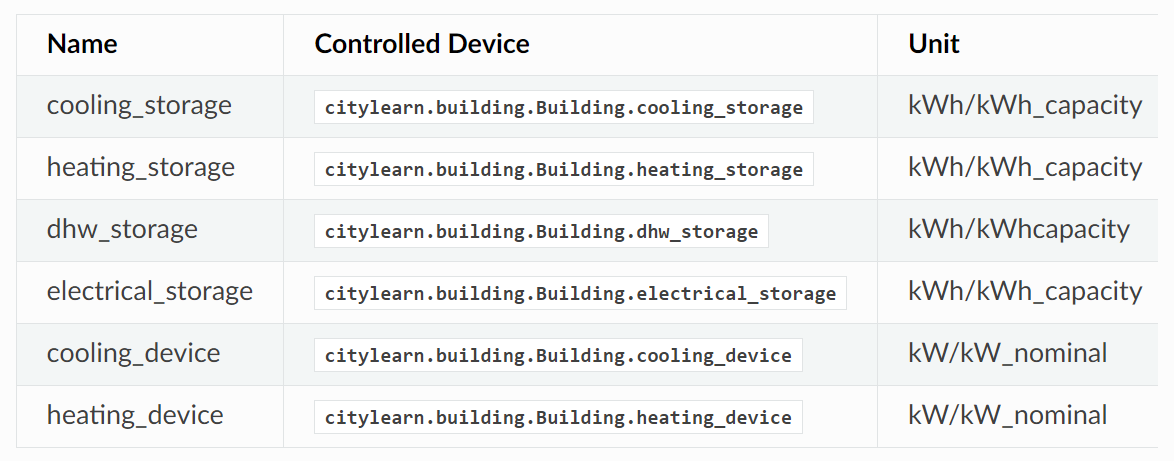

# **The Reward Function**

There are two main ways to induce desired behaviors of AI agents without explicity perscrbing their policies. The first involves imposing constraints on their behavior (e.g. speed limit) or specifying social-laws that restrict their actions (e.g. drive on the right side of the road). The second involves specifying a reward function that defines the numeric signal that is passed to the agent at every time-step. The Reward function is used as an incentive mechanism that tells the agent what is correct and what is wrong using reward and punishment. Since agents aim to maximize the **total** accumulated reward (over time), it may be optimal to sacrifice immediate rewards in order to maximize the total rewards.

For the citylearn environment, a reward is calculated and returned each time citylearn.citylearn.CityLearnEnv.step() is called.

The reward time series is also accessible through the citylearn.citylearn.CityLearnEnv.rewards property.

 Example of reward functions that are implemented are within the CityLearn environment are given below.


 In the following:

*   $t$ is the current time step
*   $n$ is the number of buildings
*   $r^{i,t}$ is the reward of building $i$ at time step $t$
*   $e^{i,t}$ is building $i$'s net electricity consumption at time $t$
*   ${T}^{i,t}_{in}$ is a building’s indoor dry-bulb temperature at time $t$
*   ${T}^{i}_{spt}$  is a building’s indoor dry-bulb temperature setpoint
*   ${T}^{i}_{b}$ is a building’s indoor dry-bulb temperature setpoint comfort band
*   ${E^t}$ is the district’s net electricity consumption at time $t$.




```
TODO: check if the elements above that are not index by agent i are indeed constant
```



See https://www.citylearn.net/_modules/citylearn/reward_function.html#MARL for details.

 **citylearn.reward_function.RewardFunction:**

$r^{i,t}= \min(-e^{i,t},0)$

Reward is the agent's consumption, assuming agents act independently, without sharing information through the reward signal.


**citylearn.reward_function.MARL:**


 $r^{i,t} = sign(-e^{i,t}) \times 0.01(\{{e^{i,t}}\}^2) \times \max(0,E^{t})$


accounting for the agent's own consumption (exponentiated) and the district consumption

**citylearn.reward_function.IndependentSACReward:**


 $r^{i,t}= \min(-e^3,0)$

Recommended for use with the Soft-Actor Critic (SAC) controllers.

Reward assumes agents act independently, without sharing information through the reward.

**citylearn.reward_function.SolarPenaltyReward:**



```
TODO: Check this formula
```



$$r^{i,t}= \begin{cases}
-(1.0 + \text{np.sign}(e^{i,t}) \cdot {cs}^{i,t}) \cdot |e^{i,t}| & \text{if } {cc}^i > \text{ZERO_DIVISION_CAPACITY} \\
0.0 & \text{otherwise}
\end{cases}
+ \begin{cases}
-(1.0 + \text{np.sign}(e^{i,t}) \cdot {hs}^{i,t}) \cdot |e^{i,t}| & \text{if } {hc}^i > \text{ZERO_DIVISION_CAPACITY} \\
0.0 & \text{otherwise}
\end{cases}
+ \begin{cases}
-(1.0 + \text{np.sign}(e^{i,t}) \cdot {ds}^{i,t}) \cdot |e^{i,t}| & \text{if } {dc}^i > \text{ZERO_DIVISION_CAPACITY} \\
0.0 & \text{otherwise}
\end{cases}
+ \begin{cases}
-(1.0 + \text{np.sign}(e^{i,t}) \cdot {es}^{i,t}) \cdot |e^{i,t}| & \text{if } {ec}^{i,0} > \text{ZERO_DIVISION_CAPACITY} \\
0.0 & \text{otherwise}
\end{cases}$$


*   $t$ is the current time step
*   $r^{i,t}$ is the reward of building $i$ at time step $t$
*   $e^{i,t}$ is building $i$'s net electricity consumption at time $t$
*   ${cc}^i$ is a building’s cooling_storage capacity
*   ${hc}^i$ is a building’s heating_storage capacity
*   ${dc}^i$ is a building’s dhw_storage capacity
*   ${ec}^{i,0}$ is a building’s electrical_storage capacity_history at time step 0
*   ${cs}^{i,t}$  is a building’s cooling_storage soc at $t$ divided by ${cc}^i$
*   ${hs}^{i,t}$  is a building’s heating_storage soc at $t$ divided by ${hc}^i$
*   ${ds}^{i,t}$  is a building’s dhw_storage soc at $t$ divided by ${dc}^i$
*   ${es}^{i,t}$  is a building’s electrical_storage soc at $t$ divided by ${ec}^i$
*   ZERO_DIVISION_CAPACITY = 0.00001 constant from `citylearn.energy_model`





```
class SolarPenaltyReward(RewardFunction):
    """The reward is designed to minimize electricity consumption and maximize solar generation to charge energy storage systems.

    The reward is calculated for each building, i and summed to provide the agent with a reward that is representative of all the
    building or buildings (in centralized case)it controls. It encourages net-zero energy use by penalizing grid load satisfaction
    when there is energy in the enerygy storage systems as well as penalizing net export when the energy storage systems are not
    fully charged through the penalty term. There is neither penalty nor reward when the energy storage systems are fully charged
    during net export to the grid. Whereas, when the energy storage systems are charged to capacity and there is net import from the
    grid the penalty is maximized.

    Parameters
    ----------
    env: citylearn.citylearn.CityLearnEnv
        CityLearn environment.
    """

    def __init__(self, env: CityLearnEnv):
        super().__init__(env)

    def calculate(self) -> List[float]:
        reward_list = []

        for b in self.env.buildings:
            e = b.net_electricity_consumption[-1]
            cc = b.cooling_storage.capacity
            hc = b.heating_storage.capacity
            dc = b.dhw_storage.capacity
            ec = b.electrical_storage.capacity_history[0]
            cs = b.cooling_storage.soc[-1]/cc
            hs = b.heating_storage.soc[-1]/hc
            ds = b.dhw_storage.soc[-1]/dc
            es = b.electrical_storage.soc[-1]/ec
            reward = 0.0
            reward += -(1.0 + np.sign(e)*cs)*abs(e) if cc > ZERO_DIVISION_CAPACITY else 0.0
            reward += -(1.0 + np.sign(e)*hs)*abs(e) if hc > ZERO_DIVISION_CAPACITY else 0.0
            reward += -(1.0 + np.sign(e)*ds)*abs(e) if dc > ZERO_DIVISION_CAPACITY else 0.0
            reward += -(1.0 + np.sign(e)*es)*abs(e) if ec > ZERO_DIVISION_CAPACITY else 0.0
            reward_list.append(reward)


        if self.env.central_agent:
            reward = [sum(reward_list)]
        else:
            reward = reward_list
        
        return reward
```



 $r^{i,t}= \min(\sum^{n}_{i=0}
 \{
  -(1.0+ sign(e^{i,t}) \times storage^{i,t}_{soc}\times |e^{i,t}|)
  \},0)
  $




Reward designed to minimize electricity consumption and maximize solar generation to charge energy storage systems.
Reward is calculated for each building, providing the agent with a reward that is representative of all the building's storage units and all buildings that are controlled  by the (centralized) agent.

It encourages net-zero energy use by penalizing grid load satisfaction when there is energy in the energy storage systems as well as penalizing net export when the energy storage systems are not fully charged through the penalty term.

**There is neither penalty nor reward when the energy storage systems are fully charged during net export to the grid. Whereas, when the energy storage systems are charged to capacity and there is net import from the grid the penalty is maximized.**

**citylearn.reward_function.ComfortReward**

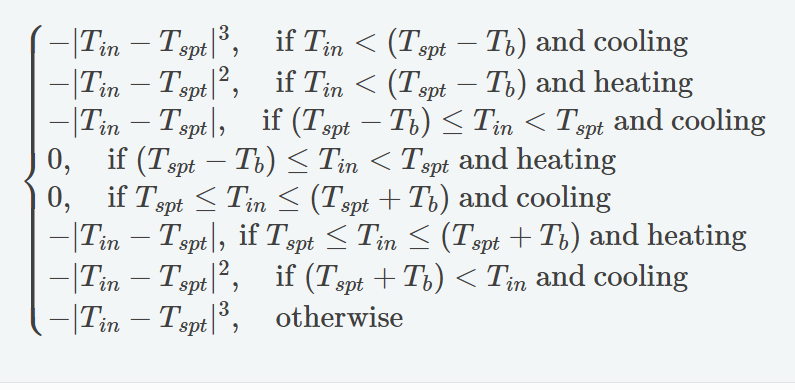

The reward is the calculated as the negative delta between the setpoint and indoor dry-bulb temperature raised to some exponent
    if outside the comfort band. If within the comfort band, the reward is the negative delta when in cooling mode and temperature
    is below the setpoint or when in heating mode and temperature is above the setpoint. The reward is 0 if within the comfort band
    and above the setpoint in cooling mode or below the setpoint and in heating mode.


# **Designing the reward function**

As we have seen above, there are many ways to define the reward function and incorporate various considerations. One of the key challenges is understanding how to incorporate long-term considerations when considering the immediate (short-term) reward function and how to incorporate a global utility function that is shared by multiple agents in the reward function of a single agent.


In a grid setting with a grid manager and prosumers, there may be two conflicting objectives. To demonstrate, the grid manager may be intetsed in minimizing operational costs but also in reducing fossil-fuel-based power generation. In constrast, the prosumers' objective is to reduce individual energy costs.

As mentioned aboce, there are various ways to guaratnee an alignmnet between these objectives even if the procumers's policy cannot be directly imposed. This can involve the introduction of certain rules, regulations, or mechanisms that ensure that the individual actions of prosumers align with the broader objective. This could involve implementing incentives or penalties that are incorporated in the reward function and that encourage prosumers to adopt practices that contribute to the global objective.

For example, the grid manager could introduce pricing mechanisms that incentivize prosumers to shift their energy consumption to times when renewable energy generation is high. This can be done by implementing time-of-use pricing, where electricity prices are higher during peak fossil-fuel generation periods. By doing so, prosumers would have a financial motivation to align their energy consumption with renewable energy generation, thereby reducing the overall reliance on fossil-fuel-based power generation.



In order to implement a custom reward function for the citylearn environment, we inherit from the base citylearn.reward_function.RewardFunction. An example of a function that only considres the net consumption is given below.



```
from typing import List
from citylearn.citylearn import CityLearnEnv
from citylearn.reward_function import RewardFunction

class CustomReward(RewardFunction):
    """Calculates custom user-defined multi-agent reward.

    Reward is the :py:attr:`net_electricity_consumption_emission`
    for entire district if central agent setup otherwise it is the
    :py:attr:`net_electricity_consumption_emission` each building.

    Parameters
    ----------
    env: citylearn.citylearn.CityLearnEnv
        CityLearn environment.
    """

    def __init__(self, env: CityLearnEnv):
        super().__init__(env)

    def calculate(self) -> List[float]:
        if self.env.central_agent:
            reward = [self.env.net_electricity_consumption_emission[-1]]

        else:
            reward = [b.net_electricity_consumption_emission[-1] for b in self.env.buildings]

        return reward
```



Note that the schema must then be updated to reference the custom reward function:

```
{
   ...,
   "reward_function": {
      "type": "custom_module.CustomReward",
      ...
   },
   ...
}
```





## **Utility Function: Key Performance Indicators (KPIs)**

CityLearn provides a set of cost functions, a.k.a Key Performance Indicators (KPI) that can be used to quantify building-level or district-level energy, comfort, environmental and economic performance. The implemented functions include the following:

citylearn.cost_function.CostFunction.average_daily_peak()

citylearn.cost_function.CostFunction.carbon_emissions()

citylearn.cost_function.CostFunction.discomfort()

citylearn.cost_function.CostFunction.load_factor()

citylearn.cost_function.CostFunction.electricity_consumption()

citylearn.cost_function.CostFunction.peak_demand()

citylearn.cost_function.CostFunction.price()

citylearn.cost_function.CostFunction.quadratic()

citylearn.cost_function.CostFunction.ramping()

citylearn.cost_function.CostFunction.zero_net_energy()


The KPIs can be reported during simulation using the `citylearn.citylearn.CityLearnEnv.evaluate` (see [docs](https://www.citylearn.net/api/citylearn.citylearn.html#citylearn.citylearn.CityLearnEnv.evaluate)).

We will see how these values can be used for visualization of the data.

## **The Data**

As mentioned above, the citylearn repo includes 1 year of operational electricity demand and PV generation data from 17 single-family buildings in the Sierra Crest home development in Fontana, California, that were studied for Grid integration of zero net energy communities.


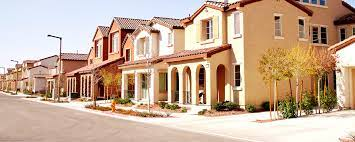


The data for the first phase (5 buildings) can be found [here](https://github.com/intelligent-environments-lab/CityLearn/tree/v1.3.0/citylearn/data/citylearn_challenge_2022_phase_1)

All the data (for the 17 buildings) can be found [here](https://github.com/intelligent-environments-lab/CityLearn/tree/master/citylearn/data/citylearn_challenge_2022_phase_all)


For the NUERIPS citylearn challenge, the dataset is split into training, validation and test portions. During the competition, participants were provided with the dataset of 5/17 buildings to train their agent(s) on.



**Note!** : this is not enough data for various ML and deep learning tools. This data scarcity problem is an issue that needs to be addressed if such tools are to be used.

# The Dataset

CityLearn makes use of datasets that are a collection of data files. The data files are used to define the simulation environment as well as provide some observation values. See [Data Files](https://www.citylearn.net/overview/dataset.html#dataset-data-files-section) for more information.

The data files refer to flat files containing time series data that is used to set observations that are agnostic to agent actions (i.e. observations that are not a function of the control actions). These files are referenced in the environment schema.json and read when citylearn.citylearn.CityLearnEnv is initialized.

The data files are desrcribes as follows:



---


**weather.csv:** 8,760 observations (one year) of actual meteorological weather data for the buildings' location used to provide observation values to the environment.


  * outdoor_dry_bulb_temperature [C] (and its predication for 6, 12 and 24 hours ahead)
  * outdoor_relative_humidity [$\%$](and its predication for 6, 12 and 24 hours ahead)
  * diffuse_solar_irradiance [$\frac{W}{m^2}$](and its predication for 6, 12 and 24 hours ahead)
  * direct_solar_irradiance [$\frac{W}{m^2}$] (and its predication for 6, 12 and 24 hours ahead)

---



**carbon_intensity.csv:** 8,760 observations (one year) of actual CO2 emission rate from grid mix for the district [kgCO2/kWh].



---



 **pricing.csv:** 8,760 observations (one year) of Time-of-Use (TOU) electricity cost (electricity_pricing)
[$\frac{\$}{kWh}$]
 and its predictions for 6, 12, and 24 hours ahead.



---





**Building_i.csv:** 8,760 observations (one year) of each building's time series data including, temporal (calendar) variables, end-use demand, solar generation and indoor environment variables.


Calendar:


* month - ranging from 1 (January) through 12 (December).
* day_type - ranging from 1 (Monday) through 7 (Sunday).
* hour - Hour of day ranging from 1 to 24.
* daylight_savings_status - Boolean

Building:

*  indoor_dry_bulb_temperature [C] (also update as part of the Runtime Calculation) - Zone volume-weighted average building dry bulb temperature.
*  average_unmet_cooling_setpoint_difference [C] - Zone volume-weighted average difference between indoor_dry_bulb_temperature and cooling temperature setpoints.
* indoor_relative_humidity [\%] - Zone volume-weighted average building relative humidity.
* non_shiftable_load [$\frac{kW}{h}$] - Total building non-shiftable plug and equipment loads.
* solar_generation [$\frac{kW}{h}$] - PV electricity generation.
* cooling_demand [$\frac{kW}{h}$] (also updated as part of the Runtime Calculation)- cooling energy supplied by cooling_device.
* heating_demand [$\frac{kW}{h}$] (also updated as part of the Runtime Calculation)- heating energy supplied by heating_device.
* indoor_dry_bulb_temperature_set_point[C] - Zone volume-weighted average building dry bulb temperature set point.
* indoor_dry_bulb_temperature_delta [C]  (also updated as part of the Runtime Calculation) - Absolute difference between indoor_dry_bulb_temperature and indoor_dry_bulb_temperature_set_point observations.






---




In addition to the data that is inculded in the data file - the observations that are provided to the agent include the following features that are computed at runtime (in addition to those that are mentioned above)

* Cooling_storage_soc [$\frac{kWh}{kWh-capacity}$]
* heating_storage_soc [$\frac{kWh}{kWh-capacity}$]
* dhw_storage_soc [$\frac{kWh}{kWh-capacity}$]
* electrical_storage_soc [$\frac{kWh}{kWh-capacity}$]
* net_electricity_consumption [$kWh$]
* cooling_device_cop [1]
* heating_device_cop [1]


Taken from https://www.citylearn.net/overview/observations.html

# The Schema File




**schema.json:** JSON model of the environment that is loaded at runtime.
This file can be manipulated to assess the impact of parameters on the environment and policy and reward function design. However, it is important to be aware of the version of schema.json that is used for evaluation.



**Important!** The schema.json file defines not only the structure of the data, but also the dynamics of the simulation (e.g., which actions are available to the agents) and the type of agent that represents the agents' decision making.

For example, the fact that out of the four actions that are defined in this setting, the only one that is available is the one that deals with the electrical storage is refelected in the schema file by specifying all other actions as false.

```
 "actions": {
    "cooling_storage": {
      "active": false
    },
    "heating_storage": {
      "active": false
    },
    "dhw_storage": {
      "active": false
    },
    "electrical_storage": {
      "active": true
    }
  },
```



# **Loading the data**

Decide which dataset to use (e.g.'citylearn_challenge_2022_phase_1', 'citylearn_challenge_2022_phase_all'). To start off, it's best to use the phase_1 dataset - so that things run quickly.

In [ ]:
dataset_name = 'citylearn_challenge_2022_phase_1'

Initialize the CityLearn environment with the data set.

In [ ]:
env = CityLearnEnv(dataset_name)

**The observation and action space**

Reset the environemnt and print the last joint observation of each building

In [ ]:
joint_observation = env.reset()
print(joint_observation)

[[7, 7, 24, 20.0, 18.3, 22.8, 20.0, 84.0, 81.0, 68.0, 81.0, 0.0, 25.0, 964.0, 0.0, 0.0, 100.0, 815.0, 0.0, 0.1707244126403808, 2.2758, 0.0, 0.0, 2.2758, 0.22, 0.22, 0.22, 0.22], [7, 7, 24, 20.0, 18.3, 22.8, 20.0, 84.0, 81.0, 68.0, 81.0, 0.0, 25.0, 964.0, 0.0, 0.0, 100.0, 815.0, 0.0, 0.1707244126403808, 2.18875, 0.0, 0.0, 2.18875, 0.22, 0.22, 0.22, 0.22], [7, 7, 24, 20.0, 18.3, 22.8, 20.0, 84.0, 81.0, 68.0, 81.0, 0.0, 25.0, 964.0, 0.0, 0.0, 100.0, 815.0, 0.0, 0.1707244126403808, 1.0096232096354177e-07, 0.0, 0.0, 1.0096232096354177e-07, 0.22, 0.22, 0.22, 0.22], [7, 7, 24, 20.0, 18.3, 22.8, 20.0, 84.0, 81.0, 68.0, 81.0, 0.0, 25.0, 964.0, 0.0, 0.0, 100.0, 815.0, 0.0, 0.1707244126403808, 2.81915, 0.0, 0.0, 2.81915, 0.22, 0.22, 0.22, 0.22], [7, 7, 24, 20.0, 18.3, 22.8, 20.0, 84.0, 81.0, 68.0, 81.0, 0.0, 25.0, 964.0, 0.0, 0.0, 100.0, 815.0, 0.0, 0.1707244126403808, 0.7714333333333336, 0.0, 0.0, 0.7714333333333336, 0.22, 0.22, 0.22, 0.22]]


We can examine the observation of each building



In [ ]:
print(len(joint_observation[0]))
print(joint_observation[0])

28
[7, 7, 24, 20.0, 18.3, 22.8, 20.0, 84.0, 81.0, 68.0, 81.0, 0.0, 25.0, 964.0, 0.0, 0.0, 100.0, 815.0, 0.0, 0.1707244126403808, 2.2758, 0.0, 0.0, 2.2758, 0.22, 0.22, 0.22, 0.22]


To know what each item in the observation means we can use the schema (and identify the elements within the schema which are active)

In [ ]:
obs_elements = []
for item in env.schema['observations'].items():
  if item[1]['active'] == True:
    print(item[0])

month
day_type
hour
outdoor_dry_bulb_temperature
outdoor_dry_bulb_temperature_predicted_6h
outdoor_dry_bulb_temperature_predicted_12h
outdoor_dry_bulb_temperature_predicted_24h
outdoor_relative_humidity
outdoor_relative_humidity_predicted_6h
outdoor_relative_humidity_predicted_12h
outdoor_relative_humidity_predicted_24h
diffuse_solar_irradiance
diffuse_solar_irradiance_predicted_6h
diffuse_solar_irradiance_predicted_12h
diffuse_solar_irradiance_predicted_24h
direct_solar_irradiance
direct_solar_irradiance_predicted_6h
direct_solar_irradiance_predicted_12h
direct_solar_irradiance_predicted_24h
carbon_intensity
non_shiftable_load
solar_generation
electrical_storage_soc
net_electricity_consumption
electricity_pricing
electricity_pricing_predicted_6h
electricity_pricing_predicted_12h
electricity_pricing_predicted_24h


To examine the action space of each building, we can do the following

In [ ]:
print(env.buildings[0].action_space)

Box(-0.78125, 0.78125, (1,), float32)


As can be seen above, the action space is of type Box, which represents a continous action with a real-value range.
This action represents the precentage of electrical energy capacity that is loaded to the battary.

**Applying Actions**

In [ ]:
# setting each building next action
building_0_action = [1.]
building_1_action = [1.]
building_2_action = [1.]
building_3_action = [1.]
building_4_action = [1.]

# collecting the actions into a joint-actions object (list of lists)
buildings_actions = [
                      building_0_action,
                      building_1_action,
                      building_2_action,
                      building_3_action,
                      building_4_action,
                     ]

# sending the actions into the environment and stepping
observations_, rewards, done, info = env.step(buildings_actions)

electrical_storage_action : float, default: 0.0
            Fraction of `electrical_storage` `capacity` to charge/discharge by.

In [ ]:
# Printing the 'electrical_storage_soc' of the 0^th building
print(observations_[0][-6])

0.99999609375


Note that even though the actions were to fully charge the battery, it only loaded 0.7 of its capacity. This is due to the limit on the charging rate. If we perform this action again (by re-running the last two code cells) we will see the battery's soc will be higher.

The implementation of the electrical storage action is the following:





```
 def update_electrical_storage(self, action: float):
        r"""Charge/discharge `electrical_storage`.

        Parameters
        ----------
        action : float
            Fraction of `electrical_storage` `capacity` to charge/discharge by.
        """

        energy = action*self.electrical_storage.capacity
        self.electrical_storage.charge(energy)
```



The function that peforms the update of the battery's SOC



```
    def charge(self, energy: float):
        """Charges or discharges storage with respect to specified energy while considering `capacity` degradation
        and `soc_init` limitations, losses to the environment quantified by `efficiency`, `power_efficiency_curve` and `capacity_power_curve`.

        Parameters
        ----------
        energy : float
            Energy to charge if (+) or discharge if (-) in [kWh].

        Notes
        -----
        If charging, soc = min(`soc_init` + energy*`efficiency`, `max_input_power`, `capacity`)
        If discharging, soc = max(0, `soc_init` + energy/`efficiency`, `max_output_power`)
        """

        energy = min(energy, self.get_max_input_power()) if energy >= 0 else max(-self.get_max_output_power(), energy)
        self.efficiency = self.get_current_efficiency(energy)
        super().charge(energy)
        self.capacity = self.capacity - min(self.degrade(), self.capacity)
        ```



# Conclusion

This concludes our exploration of the citylearn environment and its uses for MARL and smart grid's research. In the following presentations, we will show how we can analyze the environment's data and how we can use it to evaluate the performance of AI agents.